#  Feature Selection
- Feature selection is a crucial step in machine learning that involves identifying and selecting the most relevant features (variables) for building predictive models.
- By reducing the number of irrelevant or redundant features, feature selection helps improve model performance, interpretability, and efficiency.

## Why Feature Selection is Important:
- Improves Model Performance: Removing irrelevant features reduces noise, which can lead to better accuracy and generalization on unseen data.
- Reduces Overfitting: A simpler model with fewer features is less likely to overfit the training data.
- Enhances Interpretability: Models are easier to understand and interpret when they rely on fewer features.
- Increases Efficiency: Fewer features mean reduced computational costs and faster training times.

## Types of Feature Selection Techniques:
### 1. Filter Methods
- Independent of the machine learning model.
- Features are selected based on statistical tests or measures like:
- Correlation Coefficient: Measures the relationship between features and the target variable.
- Chi-Square Test: Assesses the independence between categorical features and the target.
- Variance Threshold: Removes features with low variance.
- Mutual Information: Measures the amount of information a feature contributes about the target.

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")

# Calculate correlation coefficients
correlations = X.corrwith(y)
print("Correlation Coefficients:\n", correlations)

# Selecting features with a correlation coefficient above a threshold
threshold = 0.2
selected_features = correlations[abs(correlations) > threshold].index
X_filtered = X[selected_features]

print("\nSelected Features (Filter - Correlation):")
print(X_filtered.head())


Correlation Coefficients:
 sepal length (cm)    0.782561
sepal width (cm)    -0.426658
petal length (cm)    0.949035
petal width (cm)     0.956547
dtype: float64

Selected Features (Filter - Correlation):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


### 2. Wrapper Methods
- Evaluate subsets of features by training a model and assessing its performance.
### Examples:
- Forward Selection: Starts with no features, adds one at a time, and evaluates the model.
- Backward Elimination: Starts with all features, removes one at a time, and evaluates the model.
- Recursive Feature Elimination (RFE): Iteratively removes the least important feature based on model weights or coefficients.

In [4]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest model
model = RandomForestClassifier(random_state=42)

# Perform RFE to select 2 features
rfe = RFE(model, n_features_to_select=2)
X_rfe = rfe.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[rfe.support_]
print("\nSelected Features (Wrapper - RFE):")
print(selected_features)



Selected Features (Wrapper - RFE):
Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


### 3. Embedded Methods
- Feature selection is part of the model training process.
#### Examples:
- LASSO (L1 Regularization): Shrinks some feature coefficients to zero, effectively performing selection.
- Ridge Regression (L2 Regularization): Penalizes large coefficients but does not shrink them to zero.
- Tree-Based Methods: Decision trees and ensemble methods (e.g., Random Forest, XGBoost) rank features by importance.

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importance scores
feature_importances = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Select top 2 features
top_features = importance_df.head(2)["Feature"]
X_embedded = X[top_features]

print("\nFeature Importance Scores (Embedded - Random Forest):")
print(importance_df)
print("\nSelected Features (Embedded - Random Forest):")
print(X_embedded.head())



Feature Importance Scores (Embedded - Random Forest):
             Feature  Importance
2  petal length (cm)    0.436130
3   petal width (cm)    0.436065
0  sepal length (cm)    0.106128
1   sepal width (cm)    0.021678

Selected Features (Embedded - Random Forest):
   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2


### 4. Hybrid Methods
- Hybrid methods combine filter and wrapper methods to leverage the strengths of both.

#### Example Workflow:
- Use filter methods (e.g., correlation or mutual information) to shortlist features.
- Apply wrapper methods (e.g., RFE or forward selection) on the shortlisted features.

In [6]:
from sklearn.feature_selection import RFE

# Step 1: Apply Filter Method (Correlation)
correlations = X.corrwith(y)
threshold = 0.2
selected_features_filter = correlations[abs(correlations) > threshold].index
X_filtered = X[selected_features_filter]

# Step 2: Apply Wrapper Method (RFE) on Filtered Features
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=1)  # Select the best single feature
X_hybrid = rfe.fit_transform(X_filtered, y)

# Get the final selected feature
final_feature = selected_features_filter[rfe.support_]
print("\nSelected Feature (Hybrid Method):", final_feature)



Selected Feature (Hybrid Method): Index(['petal length (cm)'], dtype='object')


# Feature Scaling in Machine Learning
- Feature scaling is the process of normalizing or standardizing the range of independent variables (features) in your data.
- It ensures that features contribute proportionately to the machine learning model, especially when features have different units or scales.

## Why is Feature Scaling Important?

#### Improves Model Performance:

- Algorithms like gradient descent converge faster when features are scaled.

#### Avoids Dominance of Large-Scale Features:

- Features with larger ranges can dominate distance-based algorithms, leading to biased predictions.
#### Ensures Uniform Contribution:

- Scaling ensures each feature contributes equally, which is critical for models sensitive to feature magnitude.
#### Required for Distance-Based Algorithms:

- Algorithms like k-Nearest Neighbors (k-NN), Support Vector Machines (SVM), and Principal Component Analysis (PCA) depend on feature magnitudes.


## When to Apply Feature Scaling
- Feature scaling is particularly important for algorithms that are sensitive to feature magnitudes. These include:

- Distance-based algorithms (e.g., k-NN, K-Means Clustering).
- Gradient descent-based optimization algorithms (e.g., Logistic Regression, Neural Networks).
- Algorithms using regularization (e.g., LASSO, Ridge Regression).
- Dimensionality reduction techniques (e.g., PCA).


- It is not required for algorithms like Decision Trees, Random Forests, or Gradient Boosting, as these are not sensitive to feature magnitudes.

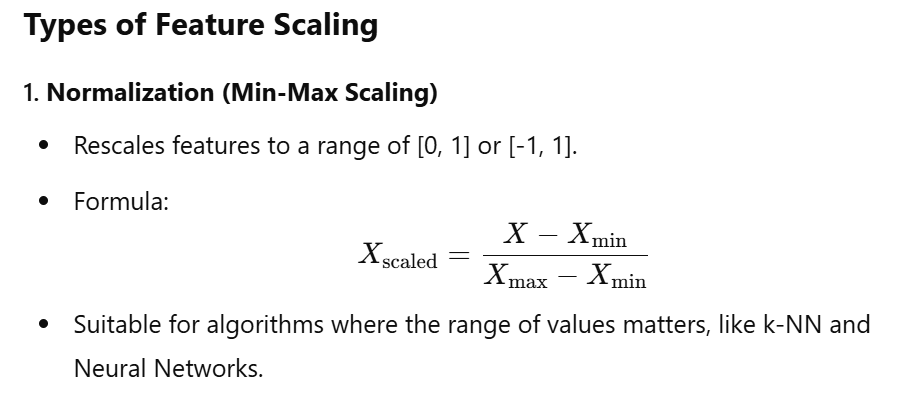

In [11]:
from IPython.display import Image, display

# Path to your local image file
image_path = "D:\images\\nor.png"

# Display the image
display(Image(filename=image_path))

In [15]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Min-Max Scaling
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

# Convert to DataFrame for better visualization
X_minmax_df = pd.DataFrame(X_minmax, columns=X.columns)

print("Min-Max Scaled Data (First 5 Rows):")
print(X_minmax_df.head())


Min-Max Scaled Data (First 5 Rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667


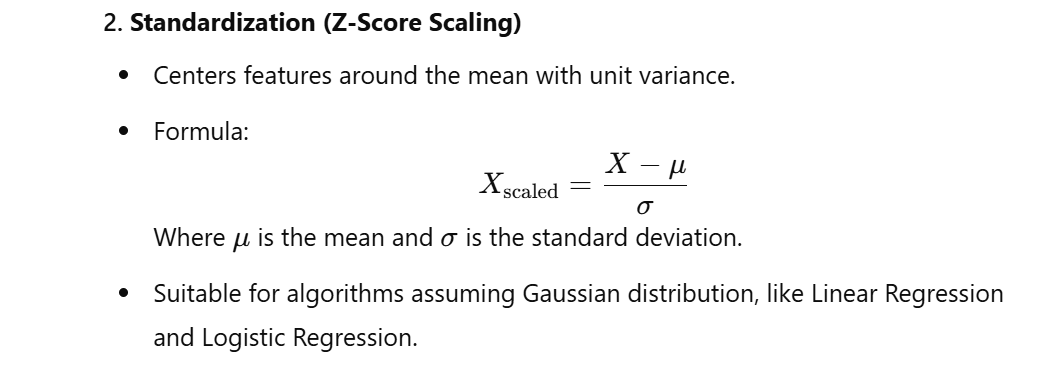

In [12]:
# Path to your local image file
image_path = "D:\images\\std.png"

# Display the image
display(Image(filename=image_path))

In [16]:
from sklearn.preprocessing import StandardScaler

# Standard Scaling
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

# Convert to DataFrame for better visualization
X_standard_df = pd.DataFrame(X_standard, columns=X.columns)

print("Standard Scaled Data (First 5 Rows):")
print(X_standard_df.head())


Standard Scaled Data (First 5 Rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


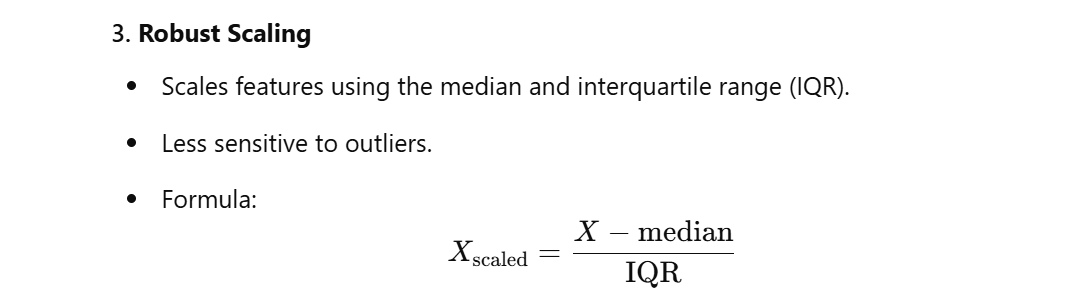

In [13]:
# Path to your local image file
image_path = "D:\images\\ro.png"

# Display the image
display(Image(filename=image_path))

In [17]:
from sklearn.preprocessing import RobustScaler

# Robust Scaling
scaler = RobustScaler()
X_robust = scaler.fit_transform(X)

# Convert to DataFrame for better visualization
X_robust_df = pd.DataFrame(X_robust, columns=X.columns)

print("Robust Scaled Data (First 5 Rows):")
print(X_robust_df.head())


Robust Scaled Data (First 5 Rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.538462               1.0          -0.842857         -0.733333
1          -0.692308               0.0          -0.842857         -0.733333
2          -0.846154               0.4          -0.871429         -0.733333
3          -0.923077               0.2          -0.814286         -0.733333
4          -0.615385               1.2          -0.842857         -0.733333


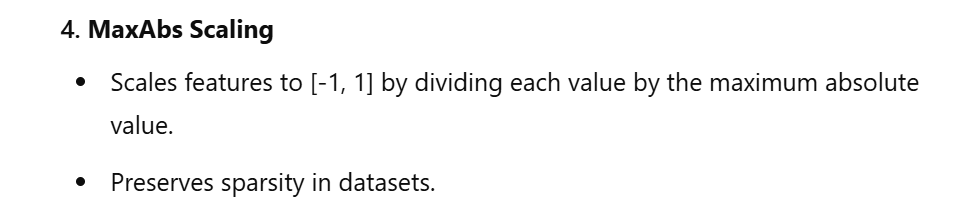

In [14]:
# Path to your local image file
image_path = "D:\images\\max.png"

# Display the image
display(Image(filename=image_path))

In [18]:
from sklearn.preprocessing import MaxAbsScaler

# MaxAbs Scaling
scaler = MaxAbsScaler()
X_maxabs = scaler.fit_transform(X)

# Convert to DataFrame for better visualization
X_maxabs_df = pd.DataFrame(X_maxabs, columns=X.columns)

print("MaxAbs Scaled Data (First 5 Rows):")
print(X_maxabs_df.head())


MaxAbs Scaled Data (First 5 Rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.645570          0.795455           0.202899              0.08
1           0.620253          0.681818           0.202899              0.08
2           0.594937          0.727273           0.188406              0.08
3           0.582278          0.704545           0.217391              0.08
4           0.632911          0.818182           0.202899              0.08


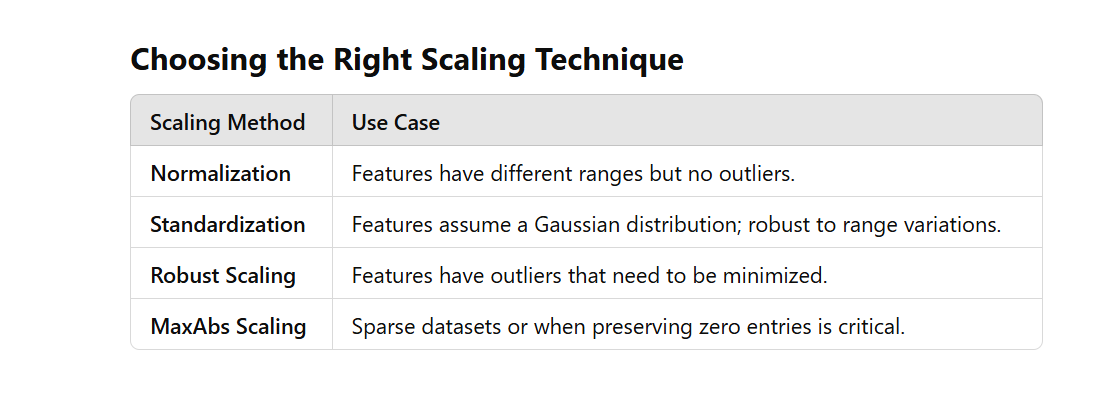

In [19]:
# Path to your local image file
image_path = "D:\images\\co.png"

# Display the image
display(Image(filename=image_path))